# Object oriented programming

In [5]:
import cv2
import matplotlib.pyplot as plt

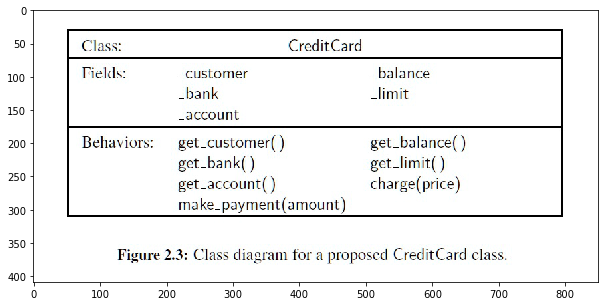

In [6]:
fig,axes = plt.subplots(1,1,figsize=(20,5))
img = cv2.imread("creditcard.jpg")
plt.imshow(img)
plt.show()

In [8]:
class CreditCard:
#A consumer credit card.
    def __init__(self, customer, bank, acnt, limit):
#Create a new credit card instance.
#The initial balance is zero.
#customer the name of the customer (e.g., John Bowman )
#bank the name of the bank (e.g., California Savings )
#acnt the acount identifier (e.g., 5391 0375 9387 5309 )
#limit credit limit (measured in dollars)
        self.customer = customer
        self.bank = bank
        self.account = acnt
        self.limit = limit
        self.balance = 0
    def get_customer(self):
#"""Return name of the customer."""
        return self.customer
    def get_bank(self):
#Return the bank s name.
        return self.bank
    def get_account(self):
#"Return the card identifying number (typically stored as a string)."
        return self.account
    def get_limit(self):
#"Return current credit limit."
        return self.limit
    def get_balance(self):
#"Return current balance."
        return self.balance
    def charge(self, price):
# ”””Charge given price to the card, assuming sufficient credit limit.
#Return True if charge was processed; False if charge was denied.
        if price + self.balance > self.limit: # if charge would exceed limit,
            return False # cannot accept charge
        else:
            self.balance += price
            return True
    def make_payment(self, amount):
#”””Process customer payment that reduces balance.”””
            self.balance -= amount

In [9]:
if __name__ == '__main__':
        wallet = [ ]
        wallet.append(CreditCard( 'John Bowman' , 'California Savings' ,'5391 0375 9387 5309' , 2500) )
        wallet.append(CreditCard( 'John Bowman' , 'California Federal' ,'3485 0399 3395 1954' , 3500) )
        wallet.append(CreditCard( 'John Bowman' , 'California Finance' ,'5391 0375 9387 5309' , 5000) )
        for val in range(1,17):
            wallet[0].charge(val)
            wallet[1].charge(2*val)
            wallet[2].charge(3*val)
        for c in range(3):
            print('Customer = ', wallet[c].get_customer( ))
            print( 'Bank = ', wallet[c].get_bank())
            print( 'Account = ', wallet[c].get_account( ))
            print( 'Limit = ', wallet[c].get_limit( ))
            print( 'Balance = ', wallet[c].get_balance())
            while wallet[c].get_balance( ) > 100:
                wallet[c].make_payment(100)
                print( 'New balance = ', wallet[c].get_balance())
            print( )

Customer =  John Bowman
Bank =  California Savings
Account =  5391 0375 9387 5309
Limit =  2500
Balance =  136
New balance =  36

Customer =  John Bowman
Bank =  California Federal
Account =  3485 0399 3395 1954
Limit =  3500
Balance =  272
New balance =  172
New balance =  72

Customer =  John Bowman
Bank =  California Finance
Account =  5391 0375 9387 5309
Limit =  5000
Balance =  408
New balance =  308
New balance =  208
New balance =  108
New balance =  8



In [10]:
cc = CreditCard( 'John Doe', '1st Bank' , '5391 0375 9387 5309' , 1000)

In [11]:
cc.get_customer()

'John Doe'

In [12]:
cc.get_bank()

'1st Bank'

In [26]:
cc.get_account()

'5391 0375 9387 5309'

In [27]:
cc.get_limit()

1000

In [28]:
cc.get_balance()

0

In [29]:
cc.charge(500)

True

In [30]:
cc.get_balance()

500

In [31]:
cc.make_payment(500)

In [32]:
cc.get_balance()

0

### Operator overloading

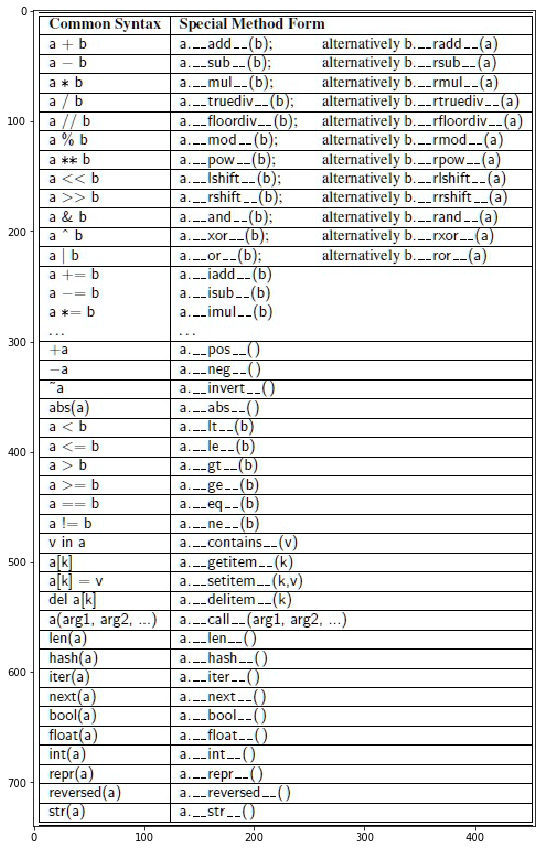

In [7]:
fig,axes = plt.subplots(1,1,figsize=(20,15))
img = cv2.imread("operatoroverloading.jpg")
plt.imshow(img)
plt.show()

In [12]:
class Vector:
#Represent a vector in a multidimensional space.”””
    def __init__(self, d):
#Create d-dimensional vector of zeros.”””
        self._coords = [0]*d
    def __len__(self):
#Return the dimension of the vector.”””
        return len(self._coords)
    def __getitem__(self, j):
#Return jth coordinate of vector.”””
        return self._coords[j]
    def __setitem__(self, j, val):
#Set jth coordinate of vector to given value.”””
        self._coords[j] = val
    def __add__(self, other):
#Return sum of two vectors.”””
        if len(self) != len(other): # relies on len method
            raise ValueError( 'dimensions must agree' )
        result = Vector(len(self)) # start with vector of zeros
        for j in range(len(self)):
            result[j] = self[j] + other[j]
        return result
    def __eq__(self, other):
#Return True if vector has same coordinates as other.”””
        return self._coords == other._coords
    def __ne__(self, other):
#Return True if vector differs from other.”””
        return not self == other # rely on existing eq definition
    def __str__(self):
#Produce string representation of vector.”””
        return '<' + str(self._coords)[1:-1] + '>' # adapt list representation

In [13]:
v = Vector(5) # construct five-dimensional <0, 0, 0, 0, 0>
v[1] = 23 # <0, 23, 0, 0, 0> (based on use of setitem )
v[-1] = 45 # <0, 23, 0, 0, 45> (also via setitem )
print(v[4]) # print 45 (via getitem )
u = v + v # <0, 46, 0, 0, 90> (via add )
print(u) # print <0, 46, 0, 0, 90>
total = 0
for entry in v: # implicit iteration via len and getitem
    total += entry

45
<0, 46, 0, 0, 90>


In [15]:
for i in v:
    print(i)

0
23
0
0
45


In [3]:
b = []
a = list(range(-5,5))
for i in a:
    b.append(~i)
print('a= ',a,'\n','b= ',b)

a=  [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4] 
 b=  [4, 3, 2, 1, 0, -1, -2, -3, -4, -5]


### Iterators

In [19]:
class SequenceIterator:
#An iterator for any of Python s sequence types.”””
    def __init__(self, sequence):
#Create an iterator for the given sequence.”””
        self.seq = sequence # keep a reference to the underlying data
        self.k = -1 # will increment to 0 on first call to next
    def __next__(self):
#Return the next element, or else raise StopIteration error.”””
        self.k += 1 # advance to next index
        if self.k < len(self.seq):
            return(self.seq[self.k]) # return the data element
        else:
            raise StopIteration( ) # there are no more elements
    def __iter__(self):
#By convention, an iterator must return itself as an iterator.”””
        return self

In [20]:
a = SequenceIterator([1,2,3,4])

In [21]:
for i in a:
    print(i)

1
2
3
4


### Range

In [28]:
class Range:
#A class that mimic s the built-in range class.”””
    def __init__(self, start, stop=None, step=1):
#Initialize a Range instance.Semantics is similar to built-in range class.
        if step == 0:
            raise ValueError('step cannot be 0')
        if stop is None: # special case of range(n)
            start,stop = 0, start # should be treated as if range(0,n)
# calculate the effective length once
        self.length = max(0, (stop - start + step - 1) // step)
# need knowledge of start and step (but not stop) to support getitem
        self.start = start
        self.step = step
    def __len__(self):
#Return number of entries in the range.”””
        return self.length
    def __getitem__(self, k):
#Return entry at index k (using standard interpretation if negative).”””
        if k < 0:
            k += len(self) # attempt to convert negative index
        if not 0 <= k < self.length:
            raise IndexError('index out of range')
        return self.start + k*self.step

In [29]:
a = Range(1,5,2)

In [30]:
for i in a:
    print(i)

1
3


In [31]:
len(a)

2

In [32]:
a[0]

1

In [ ]:
class CreditCard:
#A consumer credit card.
    def __init__(self, customer, bank, acnt, limit):
#Create a new credit card instance.
#The initial balance is zero.
#customer the name of the customer (e.g., John Bowman )
#bank the name of the bank (e.g., California Savings )
#acnt the acount identifier (e.g., 5391 0375 9387 5309 )
#limit credit limit (measured in dollars)
        self.customer = customer
        self.bank = bank
        self.account = acnt
        self.limit = limit
        self.balance = 0
    def get_customer(self):
#"""Return name of the customer."""
        return self.customer
    def get_bank(self):
#Return the bank s name.
        return self.bank
    def get_account(self):
#"Return the card identifying number (typically stored as a string)."
        return self.account
    def get_limit(self):
#"Return current credit limit."
        return self.limit
    def get_balance(self):
#"Return current balance."
        return self.balance
    def charge(self, price):
# ”””Charge given price to the card, assuming sufficient credit limit.
#Return True if charge was processed; False if charge was denied.
        if price + self.balance > self.limit: # if charge would exceed limit,
            return False # cannot accept charge
        else:
            self.balance += price
            return True
    def make_payment(self, amount):
#”””Process customer payment that reduces balance.”””
            self.balance -= amount

In [16]:
class PredatoryCreditCard(CreditCard):
#An extension to CreditCard that compounds interest and fees.”””
    def __init__(self, customer, bank, acnt, limit, apr):
#Create a new predatory credit card instance.
#The initial balance is zero.
#customer the name of the customer (e.g., John Bowman )
#bank the name of the bank (e.g., California Savings )
#acnt the acount identifier (e.g., 5391 0375 9387 5309 )
#limit credit limit (measured in dollars)
#apr annual percentage rate (e.g., 0.0825 for 8.25% APR)
        super().__init__(customer, bank, acnt, limit) # call super constructor
        self.apr = apr
    def charge(self, price):
#Charge given price to the card, assuming sufficient credit limit.
#Return True if charge was processed.
#Return False and assess 5 fee if charge is denied.
        success = super().charge(price) # call inherited method
        if not success:
            self.balance += 5 # assess penalty
        return success # caller expects return value
    def process_month(self):
#Assess monthly interest on outstanding balance.”””
        if self.balance > 0:
# if positive balance, convert APR to monthly multiplicative factor
            monthly_factor = pow(1 + self.apr, 1/12)
            self.balance *= monthly_factor

In [17]:
cc = PredatoryCreditCard('john bowman','california savings','5391 0375 9387 5309',1000,0.0825)

In [31]:
cc.process_month()

In [32]:
cc.get_balance()

0

In [33]:
cc.charge(50)

True

In [34]:
cc.charge(950)

True

In [35]:
cc.charge(100)

False

In [36]:
cc.charge(100)

False

In [37]:
cc.get_balance()

1010

In [38]:
cc.process_month()

In [39]:
cc.get_balance()

1016.6942464724117

In [40]:
cc.make_payment(1016.6942464724117)

In [41]:
cc.get_balance()

0.0